In [1]:
from lensid.utils.ml_utils import *

2021-09-14 03:30:21.920130: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory
2021-09-14 03:30:21.920171: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#df_dir='../../data/dataframes/train/' ##alice
df_dir = '/home/srashti.goyal/strong-lensing-ml/data/dataframes/train/' ##CIT

# train XGB QTs

In [3]:
tag='_kaggle'
df_lensed_qts = pd.read_csv(df_dir+'lensed_QTs'+tag+'.csv',index_col=[0] )[:2400]
df_unlensed_qts_half = pd.read_csv(df_dir+'unlensed_half_QTs'+tag+'.csv' ,index_col=[0])
df_unlensed_qts_half = df_unlensed_qts_half.sample(frac = 1,random_state = 42).reset_index(drop = True)
df_train_qts = pd.concat([df_lensed_qts,df_unlensed_qts_half],ignore_index = True)
df_train_qts=df_train_qts.sample(frac = 1).reset_index(drop = True)

In [4]:
df_train_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,lsq_overlap_qts_L1,dense_V1_0,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1
128146,212,261,0,0.892552,7625.195801,0.111691,4439.208984,0.859433,7028.172852,0.103923,4409.691406,0.303270,7955.196289,0.115452,4822.916992
128147,239,300,0,0.001402,6910.300781,0.105067,4753.624512,0.123914,6656.834961,0.102327,6623.924805,0.008306,7642.163574,0.109738,5055.269043
128148,7,26,0,0.018640,6855.655273,0.102963,4802.047363,0.198626,7070.459473,0.105407,4474.561523,0.035326,7421.497070,0.108099,4561.806152
128149,211,238,0,0.881647,8011.016602,0.114701,4642.015625,0.942528,7610.587402,0.113145,5435.956543,0.906242,6699.971191,0.107592,4170.624512
128150,157,291,0,0.287542,7423.269531,0.111475,4974.874023,0.375276,7234.058594,0.106463,5809.205566,0.973313,7455.598633,0.108218,5225.893066


In [5]:
xgboost_dense_qts_model=train_xgboost_dense_qts(df_train_qts,from_df=True,scale_pos_weight=1)

In [6]:
if not os.path.exists('out'):
        os.makedirs('out')

In [7]:
joblib_file = 'out/XGBQT_0'+tag+'.pkl'  
joblib.dump(xgboost_dense_qts_model, joblib_file)

['out/XGBQT_0_kaggle.pkl']

# validate XGB QTs

In [8]:
df_lensed_qts = pd.read_csv(df_dir+'lensed_QTs'+tag+'.csv',index_col=[0] )[2400:]
df_unlensed_qts_half = pd.read_csv(df_dir+'unlensed_second_half_QTs'+tag+'.csv' ,index_col=[0])
df_unlensed_qts_half = df_unlensed_qts_half.sample(frac = 1,random_state = 42).reset_index(drop = True)
df_val_qts = pd.concat([df_lensed_qts,df_unlensed_qts_half],ignore_index = True)
df_val_qts=df_val_qts.sample(frac = 1).reset_index(drop = True)

In [9]:
df_val_qts=predict_xgboost_dense_qts(df_val_qts,xgboost_dense_qts_model)

In [10]:
df_val_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,lsq_overlap_qts_L1,dense_V1_0,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1,xgb_dense_QTS_0
126143,543,805,0,0.588510,7098.141602,0.106067,4090.162109,0.168865,7420.456543,0.111193,4316.711426,0.999087,7503.839844,0.110391,4616.687988,0.004104
126144,557,998,0,0.514492,7272.062500,0.107705,4952.596680,0.849137,7272.080566,0.105491,5534.418945,0.309858,7098.688477,0.105944,5323.695312,0.001708
126145,567,1001,0,0.532138,7312.011719,0.106609,5163.209473,0.113752,7282.761230,0.106381,5545.024414,0.801697,7959.351074,0.116076,5135.230469,0.001391
126146,933,967,0,0.898894,7342.055664,0.109004,4620.810059,0.822969,7953.542969,0.116854,4767.173828,0.941506,7408.839844,0.109446,4620.988281,0.014494
126147,661,843,0,0.180919,7152.540039,0.105281,4433.312012,0.556159,7139.945801,0.106715,4500.011719,0.000384,7010.000977,0.103988,4650.094727,0.000041


dense_H1_0 auc = 0.9255
dense_L1_0 auc = 0.9266
dense_V1_0 auc = 0.8493
xgb_dense_QTS_0 auc = 0.9521


/home/srashti.goyal/.local/lib/python3.7/site-packages/lensid/utils/ml_utils.py:847: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim, 1)


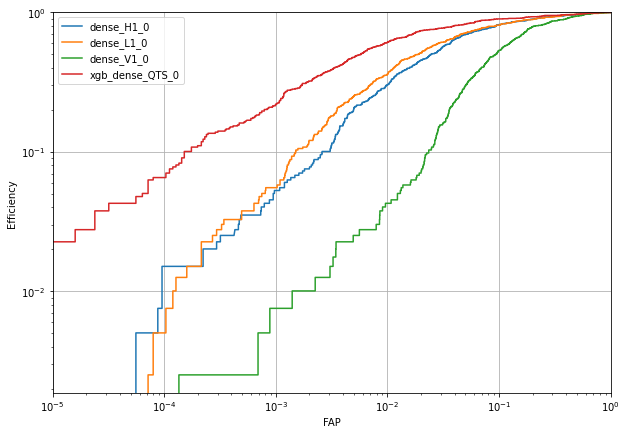

In [11]:
fig=plot_ROCs(df_val_qts,logy=True,cols=['dense_H1_0', 'dense_L1_0', 'dense_V1_0','xgb_dense_QTS_0'])

# cross-validate XGB QTs

In [12]:
df_lensed_qts = pd.read_csv(df_dir+'lensed_QTs'+tag+'.csv',index_col=[0] )[:2400]
df_unlensed_qts_half = pd.read_csv(df_dir+'unlensed_half_QTs'+tag+'.csv' ,index_col=[0])
df_unlensed_qts_second_half = pd.read_csv(df_dir+'unlensed_second_half_QTs'+tag+'.csv' ,index_col=[0])
#df_cv_qts = pd.concat([df_lensed_qts,df_unlensed_qts_half,df_unlensed_qts_second_half],ignore_index = True)
df_cv_qts = pd.concat([df_lensed_qts,df_unlensed_qts_half],ignore_index = True)

df_cv_qts=df_cv_qts.sample(frac = 1).reset_index(drop = True)

In [13]:
df_cv_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,lsq_overlap_qts_L1,dense_V1_0,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1
128146,2,423,0,0.626185,7602.107422,0.111723,3962.588867,0.978798,7955.415527,0.116511,4657.055664,0.801628,7905.667480,0.113390,4691.525391
128147,123,286,0,0.000741,6844.545898,0.101249,5043.375488,0.204617,6990.557617,0.103719,6358.641602,0.582616,7323.538086,0.107708,4192.758789
128148,65,177,0,0.271425,7336.773438,0.109215,4502.541992,0.247897,7195.313477,0.106429,4806.790527,0.438890,7400.572266,0.108326,4173.877441
128149,22,76,0,0.156099,7747.275391,0.112806,4674.920898,0.842189,7831.448730,0.115523,4737.351562,0.650615,7762.082031,0.112254,5006.636230
128150,285,458,0,0.440000,7732.556641,0.111522,5091.581055,0.846284,7279.358887,0.107122,4834.545410,0.639916,7550.950195,0.110633,4978.810059


In [14]:
cv = StratifiedKFold(n_splits = 10)


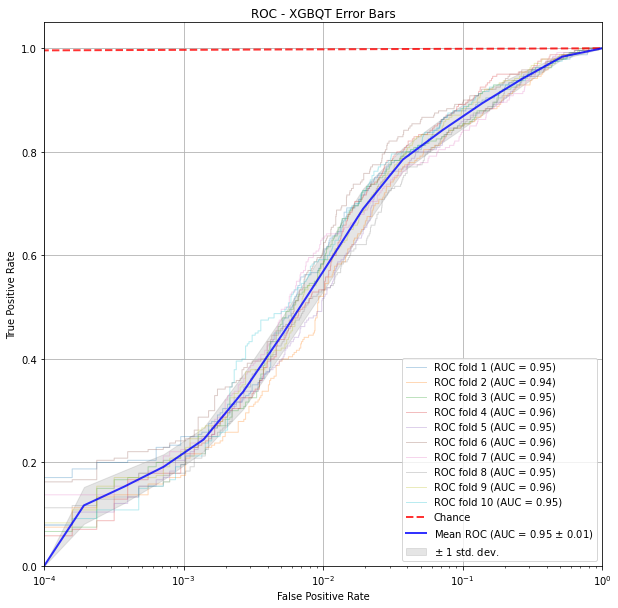

In [15]:
xgboost_dense_qts_models=[]
plt.rcParams["figure.figsize"] = (10,10)

tprs = []
aucs = []

mean_fpr = 10**np.linspace(-4,0,15)
fig,ax = plt.subplots()
cols=['dense_H1_0','dense_L1_0','dense_V1_0']
for i,(train_index, test_index) in enumerate(cv.split(df_cv_qts,df_cv_qts.Lensing.values)):
    xgboost_dense_qts_model=train_xgboost_dense_qts(df_cv_qts.iloc[train_index],from_df=True,n_estimators=135,
                      max_depth = 6, scale_pos_weight=1)
    joblib_file = "out/XGBQT_"+str(i+1)+tag+ ".pkl"  
    joblib.dump(xgboost_dense_qts_model, joblib_file)
    X=np.c_[df_cv_qts.iloc[test_index][cols]]
    viz = plot_roc_curve(xgboost_dense_qts_model,X,df_cv_qts.Lensing.values[test_index],name="ROC fold {}".format(i+1),alpha=0.3,lw=1,ax=ax)
    interp_tpr = np.interp(mean_fpr,viz.fpr,viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
        
ax.plot([0,1],[0,1],linestyle="--",lw = 2,color="r",label="Chance",alpha=0.8)
mean_tpr = np.mean(tprs,axis = 0)
mean_tpr[-1]=1.0
mean_auc = auc(mean_fpr,mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr,mean_tpr,color='b',label = r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc , std_auc),lw = 2,alpha=.8)
    
std_tpr = np.std(tprs,axis=0)
tprs_upper = np.minimum(mean_tpr +std_tpr,1)
tprs_lower = np.maximum(mean_tpr-std_tpr,0)
ax.fill_between(mean_fpr,tprs_lower,tprs_upper,color="grey",alpha=.2,label=r'$\pm$ 1 std. dev.')
    
ax.set(xlim=[1e-4,1],ylim=[0,1.05],
          title = "ROC - XGBQT Error Bars",xscale='log')
ax.legend(loc ="lower right")
#plt.savefig('ROC-XGB_QT'+tag+'.png')
plt.grid()
plt.show()

# Testing(debugging)

In [16]:
indir= 'test'
#df_dir='../../data/dataframes/test/' ##alice
df_dir = '/home/srashti.goyal/strong-lensing-ml/data/dataframes/test/' ##CIT

In [17]:
#blu_lensed = '../../data/dataframes/haris_et_al/Lensed_PE_blus.csv'
#blu_unlensed = '../../data/dataframes/haris_et_al/Unlensed_PE_blus.csv'

blu_lensed = '/home/srashti.goyal/strong-lensing-ml/data/dataframes/haris_et_al/Lensed_PE_blus.csv'
blu_unlensed = '/home/srashti.goyal/strong-lensing-ml/data/dataframes/haris_et_al/Unlensed_PE_blus.csv'



In [18]:
tag='_kaggle'
df_lensed_qts = pd.read_csv(df_dir+'lensed_QTs'+tag+'.csv',index_col=[0] )
df_unlensed_qts = pd.read_csv(df_dir+'unlensed_QTs'+tag+'.csv' ,index_col=[0])


df_test_blu_lensed = pd.read_csv(blu_lensed,index_col=[0] )
df_test_blu_unlensed = pd.read_csv(blu_unlensed,index_col=[0] )
cols=['m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn',
       'm1, m2, ra, sin_dec, costheta_jn', 'ra, sin_dec',
       '# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2',
       'm1, m2, ra, sin_dec', 'm1, m2']
df_lensed_qts=df_lensed_qts.join(df_test_blu_lensed[cols])
df_unlensed_qts=df_unlensed_qts.join(df_test_blu_unlensed[cols])
df_test_qts = pd.concat([df_lensed_qts,df_unlensed_qts],ignore_index = True)
df_test_qts=df_test_qts.sample(frac = 1).reset_index(drop = True)

In [19]:
df_test_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,...,dense_V1_0,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec","# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2","m1, m2, ra, sin_dec","m1, m2"
499787,549400000.000000000-98800,626258500.000000000-252517,0,0.981010,7205.021484,0.106603,5075.379395,0.995749,7180.421875,0.107109,...,0.853196,7341.881836,0.107811,3948.103760,6.917888e-01,1.905876e+00,1.309897e+00,7.734783e-01,2.193428e+00,2.134935e+00
499788,670401000.000000000-340802,649653500.000000000-299307,0,0.989887,7250.896484,0.109479,4528.770996,0.998613,7942.579102,0.113293,...,0.061660,7311.815918,0.108510,5205.901855,3.758941e-22,5.597647e-30,7.202079e-01,3.179368e-24,8.468120e-30,1.486143e-43
499789,503433500.000000000-6867,615184500.000000000-230369,0,0.967236,6763.947754,0.105138,4408.620605,0.633706,7483.122070,0.107216,...,0.996727,7244.172852,0.106100,5070.810547,3.171891e-01,7.316825e-01,9.430227e-01,5.223968e-01,1.324594e+00,1.880366e+00
499790,643252000.000000000-286504,529370000.000000000-58740,0,0.586825,7075.810059,0.105659,4053.924805,0.488843,7235.118164,0.109559,...,0.876833,8156.389648,0.118924,4970.515625,2.509133e-56,1.321900e-64,5.024777e-13,3.350619e-58,3.774716e-70,6.696777e-10
499791,698863500.000000000-397727,518491500.000000000-36983,0,0.971857,7579.026367,0.110160,4342.363281,0.353615,7273.479980,0.106664,...,0.780609,7674.916016,0.112264,4788.865723,3.785839e-04,1.279715e-04,1.513265e-03,1.089993e-03,1.200788e-03,1.302453e-02


In [20]:
xgboost_dense_qts_model = joblib.load('out/XGBQT_0'+tag+'.pkl')

In [21]:
df_test_qts=predict_xgboost_dense_qts(df_test_qts,xgboost_dense_qts_model)
df_test_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,...,mean_overlap_qts_V1,std_overlap_qts_V1,lsq_overlap_qts_V1,"m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2, costheta_jn","m1, m2, ra, sin_dec, costheta_jn","ra, sin_dec","# m1, m2, ra, sin_dec, a1, a2, costilt1, costilt2","m1, m2, ra, sin_dec","m1, m2",xgb_dense_QTS_0
499787,549400000.000000000-98800,626258500.000000000-252517,0,0.981010,7205.021484,0.106603,5075.379395,0.995749,7180.421875,0.107109,...,7341.881836,0.107811,3948.103760,6.917888e-01,1.905876e+00,1.309897e+00,7.734783e-01,2.193428e+00,2.134935e+00,0.272337
499788,670401000.000000000-340802,649653500.000000000-299307,0,0.989887,7250.896484,0.109479,4528.770996,0.998613,7942.579102,0.113293,...,7311.815918,0.108510,5205.901855,3.758941e-22,5.597647e-30,7.202079e-01,3.179368e-24,8.468120e-30,1.486143e-43,0.051137
499789,503433500.000000000-6867,615184500.000000000-230369,0,0.967236,6763.947754,0.105138,4408.620605,0.633706,7483.122070,0.107216,...,7244.172852,0.106100,5070.810547,3.171891e-01,7.316825e-01,9.430227e-01,5.223968e-01,1.324594e+00,1.880366e+00,0.030748
499790,643252000.000000000-286504,529370000.000000000-58740,0,0.586825,7075.810059,0.105659,4053.924805,0.488843,7235.118164,0.109559,...,8156.389648,0.118924,4970.515625,2.509133e-56,1.321900e-64,5.024777e-13,3.350619e-58,3.774716e-70,6.696777e-10,0.003825
499791,698863500.000000000-397727,518491500.000000000-36983,0,0.971857,7579.026367,0.110160,4342.363281,0.353615,7273.479980,0.106664,...,7674.916016,0.112264,4788.865723,3.785839e-04,1.279715e-04,1.513265e-03,1.089993e-03,1.200788e-03,1.302453e-02,0.006983


In [22]:
df_test_qts=df_test_qts.dropna()

ML H1 QTs auc = 0.8790
ML L1 QTs auc = 0.8695
ML V1 QTs auc = 0.8018
ML combined H1 L1 V1 QTS auc = 0.9021
$B^L_U:$ $m_1 m_2$ auc = 0.9164


/home/srashti.goyal/.local/lib/python3.7/site-packages/lensid/utils/ml_utils.py:847: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim, 1)


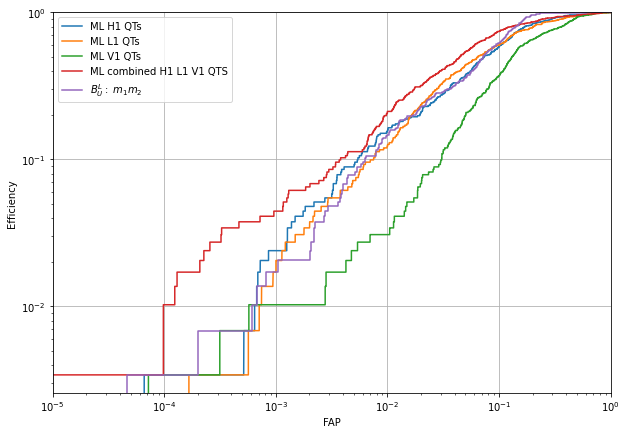

In [23]:
fig=plot_ROCs(df_test_qts,cols=['dense_H1_0' ,'dense_L1_0','dense_V1_0','xgb_dense_QTS_0','m1, m2']\
                     ,labels=['ML H1 QTs', 'ML L1 QTs', 'ML V1 QTs','ML combined H1 L1 V1 QTS', '$B^L_U:$ $m_1 m_2$'],logy=True)

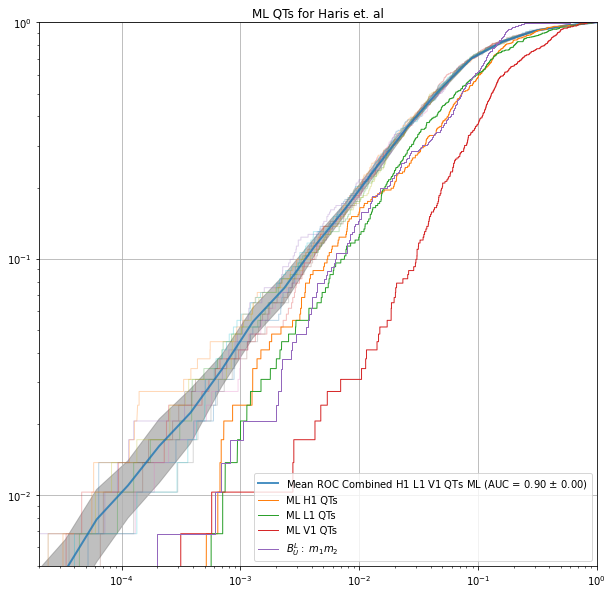

In [24]:
from sklearn.metrics import plot_roc_curve
plt.rcParams["figure.figsize"] = (10,10)

tprs = []
aucs = []

mean_fpr = 10**np.linspace(-5,0,20)
    
fig,ax = plt.subplots()
cols=['dense_H1_0','dense_L1_0','dense_V1_0']

for i in range(1,11):
    xgb_qt_cv = joblib.load("../training_cv/out/XGBQT_"+str(i)+tag+".pkl")
    df = predict_xgboost_dense_qts(df_test_qts,xgb_qt_cv)
    df_test_qts['xgb_dense_QTS_' +str(i) ]=df['xgb_dense_QTS_0']

    false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test_qts.Lensing.values, df_test_qts['xgb_dense_QTS_' +str(i)])
    roc_auc = auc(false_positive_rate, true_positive_rate)
    ax.plot(false_positive_rate,true_positive_rate,alpha=0.3,lw=1)
    interp_tpr = np.interp(mean_fpr,false_positive_rate,true_positive_rate)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    

    
mean_tpr = np.mean(tprs,axis = 0)
mean_tpr[-1]=1.0
mean_auc = auc(mean_fpr,mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr,mean_tpr,label = r'Mean ROC Combined H1 L1 V1 QTs ML (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc , std_auc),lw = 2,alpha=.8)
    
std_tpr = np.std(tprs,axis=0)
tprs_upper = np.minimum(mean_tpr +std_tpr,1)
tprs_lower = np.maximum(mean_tpr-std_tpr,0)
ax.fill_between(mean_fpr,tprs_lower,tprs_upper,color="grey",alpha=.5)


colors=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
cols=['dense_H1_0' ,'dense_L1_0','dense_V1_0','m1, m2']

labels=['ML H1 QTs', 'ML L1 QTs', 'ML V1 QTs', '$B^L_U:$ $m_1 m_2$']

for i,col in enumerate(cols):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(df_test_qts.Lensing.values, df_test_qts[col])
    plt.plot(false_positive_rate,true_positive_rate,'-',label=labels[i],lw=1)

#ax.set(xlim=[2e-5,1],ylim=[-0.05,1.05],title = "ML Skymaps for Haris et. al",xscale='log')

ax.set(xlim=[2e-5,1],ylim=[5e-3,1],title = "ML QTs for Haris et. al",xscale='log',yscale='log')
ax.grid()
ax.legend(loc ="lower right")
#plt.savefig('ROC-log-QTs-xgb'+tag+'.png')

plt.show()


In [25]:
df_test_qts.tail()

,img_0,img_1,Lensing,dense_H1_0,mean_overlap_qts_H1,std_overlap_qts_H1,lsq_overlap_qts_H1,dense_L1_0,mean_overlap_qts_L1,std_overlap_qts_L1,...,xgb_dense_QTS_1,xgb_dense_QTS_2,xgb_dense_QTS_3,xgb_dense_QTS_4,xgb_dense_QTS_5,xgb_dense_QTS_6,xgb_dense_QTS_7,xgb_dense_QTS_8,xgb_dense_QTS_9,xgb_dense_QTS_10
499787,549400000.000000000-98800,626258500.000000000-252517,0,0.981010,7205.021484,0.106603,5075.379395,0.995749,7180.421875,0.107109,...,0.312259,0.192475,0.212744,0.153938,0.289095,0.169717,0.143967,0.231825,0.187779,0.237701
499788,670401000.000000000-340802,649653500.000000000-299307,0,0.989887,7250.896484,0.109479,4528.770996,0.998613,7942.579102,0.113293,...,0.077008,0.040959,0.043198,0.041794,0.054013,0.009052,0.069605,0.035122,0.070846,0.109190
499789,503433500.000000000-6867,615184500.000000000-230369,0,0.967236,6763.947754,0.105138,4408.620605,0.633706,7483.122070,0.107216,...,0.042803,0.030301,0.026963,0.034116,0.065538,0.057774,0.043098,0.029868,0.016126,0.054490
499790,643252000.000000000-286504,529370000.000000000-58740,0,0.586825,7075.810059,0.105659,4053.924805,0.488843,7235.118164,0.109559,...,0.003517,0.002006,0.004171,0.002225,0.004100,0.002692,0.002312,0.003147,0.004440,0.002862
499791,698863500.000000000-397727,518491500.000000000-36983,0,0.971857,7579.026367,0.110160,4342.363281,0.353615,7273.479980,0.106664,...,0.014705,0.011318,0.005896,0.012349,0.008177,0.007821,0.009868,0.008721,0.017074,0.005068


In [26]:
#df_test_qts.to_csv('../../data/dataframes/test/ML_qts'+tag+'.csv')
df_test_qts.to_csv('/home/srashti.goyal/strong-lensing-ml/data/dataframes/test/ML_qts'+tag+'.csv')

/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


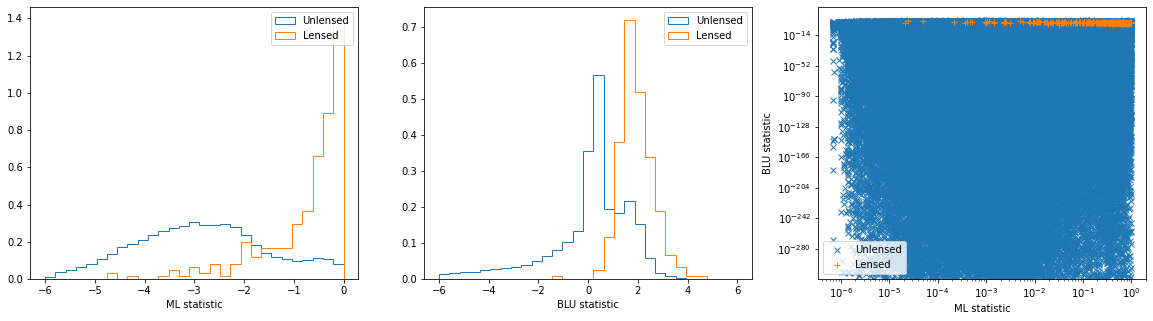

In [27]:
df_test=df_test_qts
ml_stat='xgb_dense_QTS_0'
blu_stat= 'm1, m2'
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.xlabel('ML statistic')
bins=np.linspace(-6,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Unlensed', histtype='step',density=True)
df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat]),bins=bins,label='Lensed', histtype='step',density=True)
plt.legend()
#plt.ylim(0,300)
plt.subplot(132)
plt.xlabel('BLU statistic')
bins=np.linspace(-6,6,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[blu_stat]),bins=bins,label='Unlensed', histtype='step',density=True)
df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[blu_stat]),bins=bins,label='Lensed', histtype='step',density=True)
plt.legend()
#plt.ylim(0,300)
plt.subplot(133)

plt.xlabel('ML statistic')
plt.ylabel('BLU statistic')
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat],df[blu_stat],'x',label='Unlensed')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat],df[blu_stat],'+',label='Lensed')
plt.legend()
plt.show()


/home/srashti.goyal/.local/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


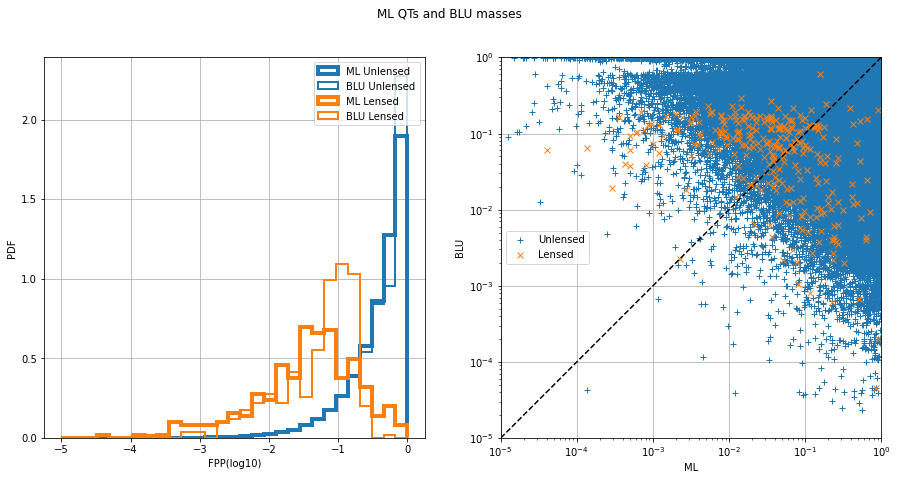

In [33]:
ml_stat='xgb_dense_QTS_0'
blu_stat= 'm1, m2'
df_test[ml_stat+'_fpp']=get_fars(df_test,ml_stat,df_test,ml_stat)
df_test[blu_stat+'_fpp']=get_fars(df_test,blu_stat,df_test,blu_stat)

plt.figure(figsize=(15,7))
plt.subplot(121)
bins=np.linspace(-5,0,30)
#plt.ylim(-100,1e3)
df=df_test[df_test['Lensing'] == 0]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Unlensed', histtype='step',density=True,color='C0',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Unlensed', histtype='step',density=True,color='C0',lw=2)

df=df_test[df_test['Lensing'] == 1]
plt.hist(np.log10(df[ml_stat+'_fpp']),bins=bins,label='ML Lensed', histtype='step',density=True,color='C1',lw=4)
plt.hist(np.log10(df[blu_stat+'_fpp']),bins=bins,label='BLU Lensed', histtype='step',density=True,color='C1',lw=2)

plt.legend()
plt.xlabel('FPP(log10)')
plt.ylabel('PDF')
plt.grid()

plt.subplot(122)
df=df_test[df_test['Lensing'] == 0]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'+',label='Unlensed',color='C0')
df=df_test[df_test['Lensing'] == 1]
plt.loglog(df[ml_stat+'_fpp'],df[blu_stat+'_fpp'],'x',label='Lensed',color='C1')
plt.loglog(10**bins,10**bins,'k--')
plt.legend()
plt.xlabel('ML')
plt.ylabel('BLU')
plt.grid()
plt.xlim(1e-5,1)
plt.ylim(1e-5,1)
plt.suptitle('ML QTs and BLU masses')
plt.show()

ML H1 QTs auc = 0.8790
ML L1 QTs auc = 0.8695
ML V1 QTs auc = 0.8018
ML combined H1 L1 V1 QTS auc = 0.9026
$B^L_U:$ $m_1 m_2$ auc = 0.9164


/home/srashti.goyal/.local/lib/python3.7/site-packages/lensid/utils/ml_utils.py:847: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(ylim, 1)


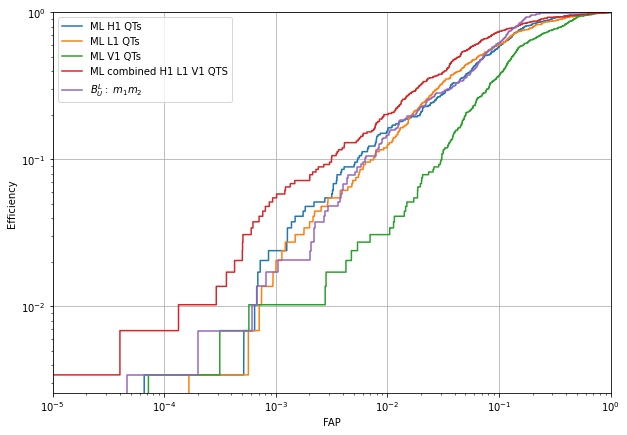

In [34]:
fig,rocs=plot_ROCs(df_test_qts,cols=['dense_H1_0' ,'dense_L1_0','dense_V1_0','xgb_dense_QTS_0','m1, m2']\
                     ,labels=['ML H1 QTs', 'ML L1 QTs', 'ML V1 QTs','ML combined H1 L1 V1 QTS', '$B^L_U:$ $m_1 m_2$'],logy=True)

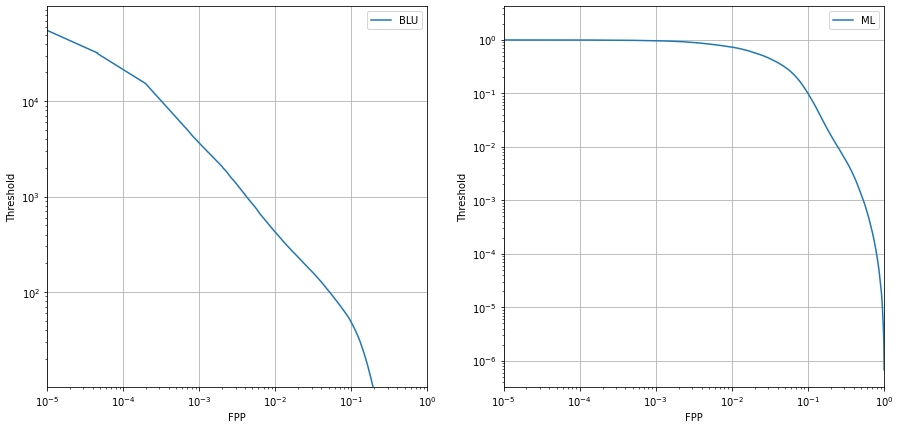

In [35]:
fpp_blu,eff_blu,thr_blu=rocs[blu_stat]
fpp_ml,eff_ml,thr_ml=rocs[ml_stat]

plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(fpp_blu,thr_blu,label='BLU')
plt.xscale('log')
plt.xlim(1e-5,1)
plt.yscale('log')
plt.ylim(np.percentile(thr_blu,10),np.max(thr_blu))
plt.legend()
plt.xlabel('FPP')
plt.ylabel('Threshold')
plt.grid()
plt.subplot(122)
plt.plot(fpp_ml,thr_ml,label='ML')
plt.xscale('log')
plt.xlim(1e-5,1)
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel('FPP')
plt.ylabel('Threshold')
plt.show()

In [36]:
#df_test_qts.to_csv('../../data/dataframes/test/ML_qts'+tag+'.csv')
df_test_qts.to_csv('/home/srashti.goyal/strong-lensing-ml/data/dataframes/test/ML_qts'+tag+'.csv')